# ABOUT PROJECT :
BASED ON A SURVEY ON LUNG CANCER OUR TASK IS TO COME UP WITH A MODEL THAT PREDICTS LUNG CANCER DIAGNOSIS BASED OFF 
FACTORS SUCH AS BLOOD SUGAR ,ALCOHOL CONSUMPTION . THE LATTER FACTORS ARE SAID TO CORRELATE HIGHLY WITH 
LUNG CANCER SINCE ITS  A LIFESTYLE DISEASE

In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.nn.functional as F

In [2]:
df = pd.read_csv("C:\\Datasets\\Lung Cancer Survey\\survey lung cancer.csv")

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.shape

(309, 16)

In [5]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [6]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# DATA VISUALIZATIONS

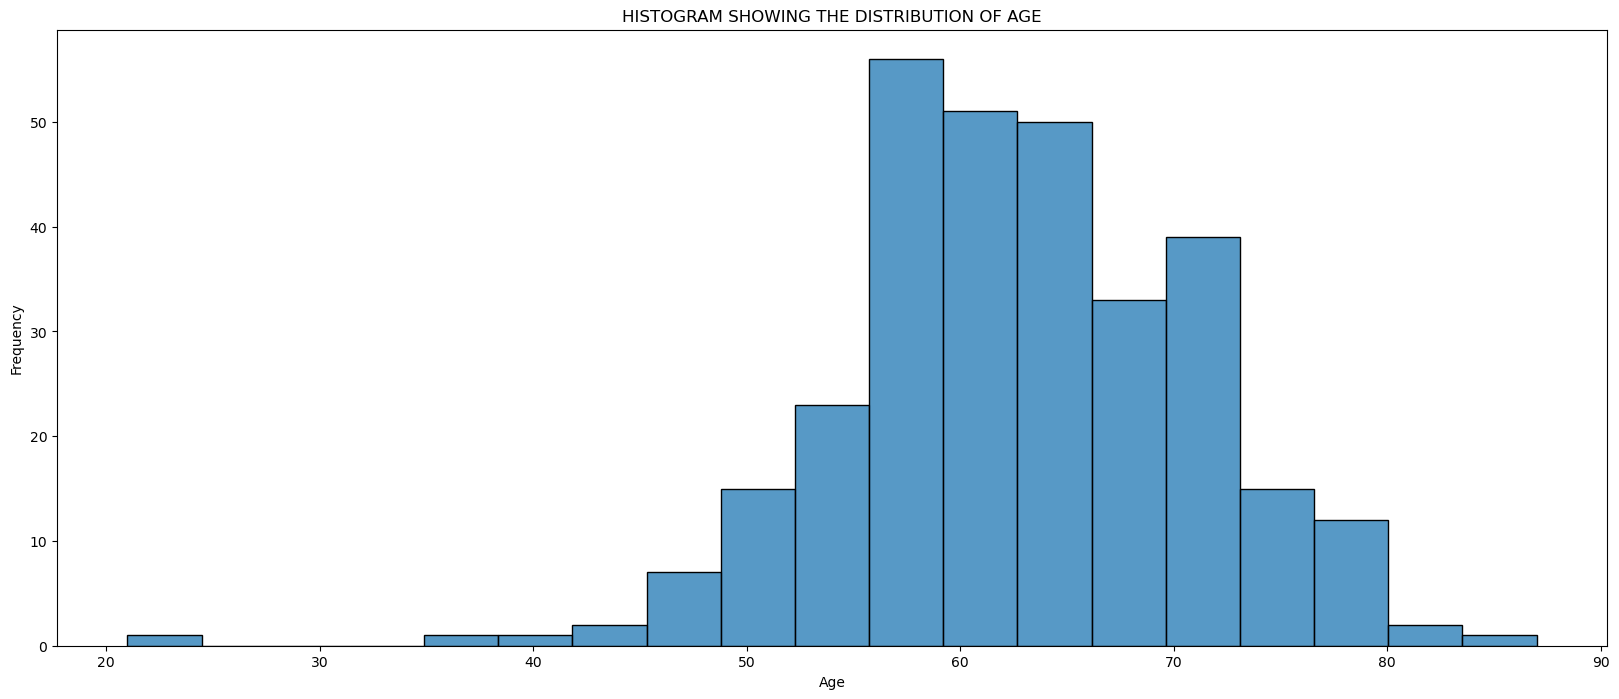

In [8]:
# Age distribution
fig = plt.figure(figsize=(20,8))
sns.histplot(x='AGE',data=df)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("HISTOGRAM SHOWING THE DISTRIBUTION OF AGE")
plt.show()

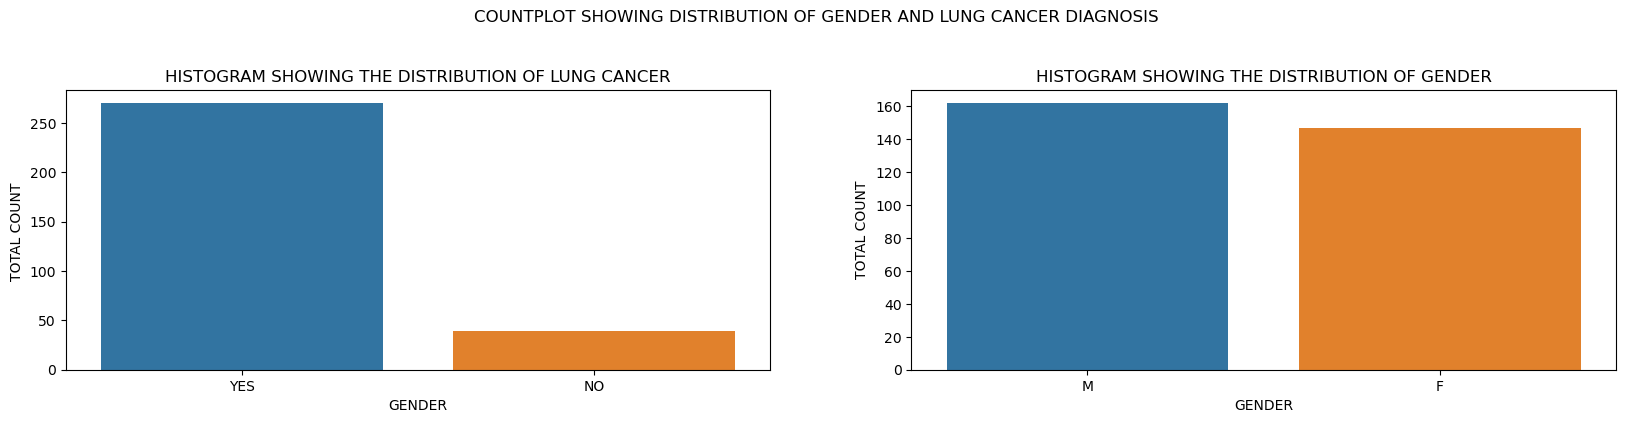

In [9]:
# A countplot for Gender and Cancer Diagnosis 
fig = plt.figure(figsize=(20,8))
fig.suptitle("COUNTPLOT SHOWING DISTRIBUTION OF GENDER AND LUNG CANCER DIAGNOSIS")
plt.subplot(2,2,1)
sns.countplot(x='LUNG_CANCER',data=df)
plt.xlabel("GENDER")
plt.ylabel("TOTAL COUNT ")
plt.title("HISTOGRAM SHOWING THE DISTRIBUTION OF LUNG CANCER")
plt.subplot(2,2,2)
sns.countplot(x='GENDER',data=df)
plt.xlabel("GENDER")
plt.ylabel("TOTAL COUNT")
plt.title("HISTOGRAM SHOWING THE DISTRIBUTION OF GENDER")
plt.show()

In [10]:
# Since there are two categorical features I will convert them into continous using Label Encoder
from sklearn.preprocessing import LabelEncoder
categorical_columns  = ['LUNG_CANCER','GENDER']
lbl_encoder = {}
for column in categorical_columns:
    lbl_encoder[column] = LabelEncoder()
    df[column] = lbl_encoder[column].fit_transform(df[column])

In [11]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [12]:
# ALL MY VALUES ARE CONTIONOUS SO I CAN CHECK THEIR CORRELATION
correlation = df.corr()
correlation

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


<Figure size 3000x800 with 0 Axes>

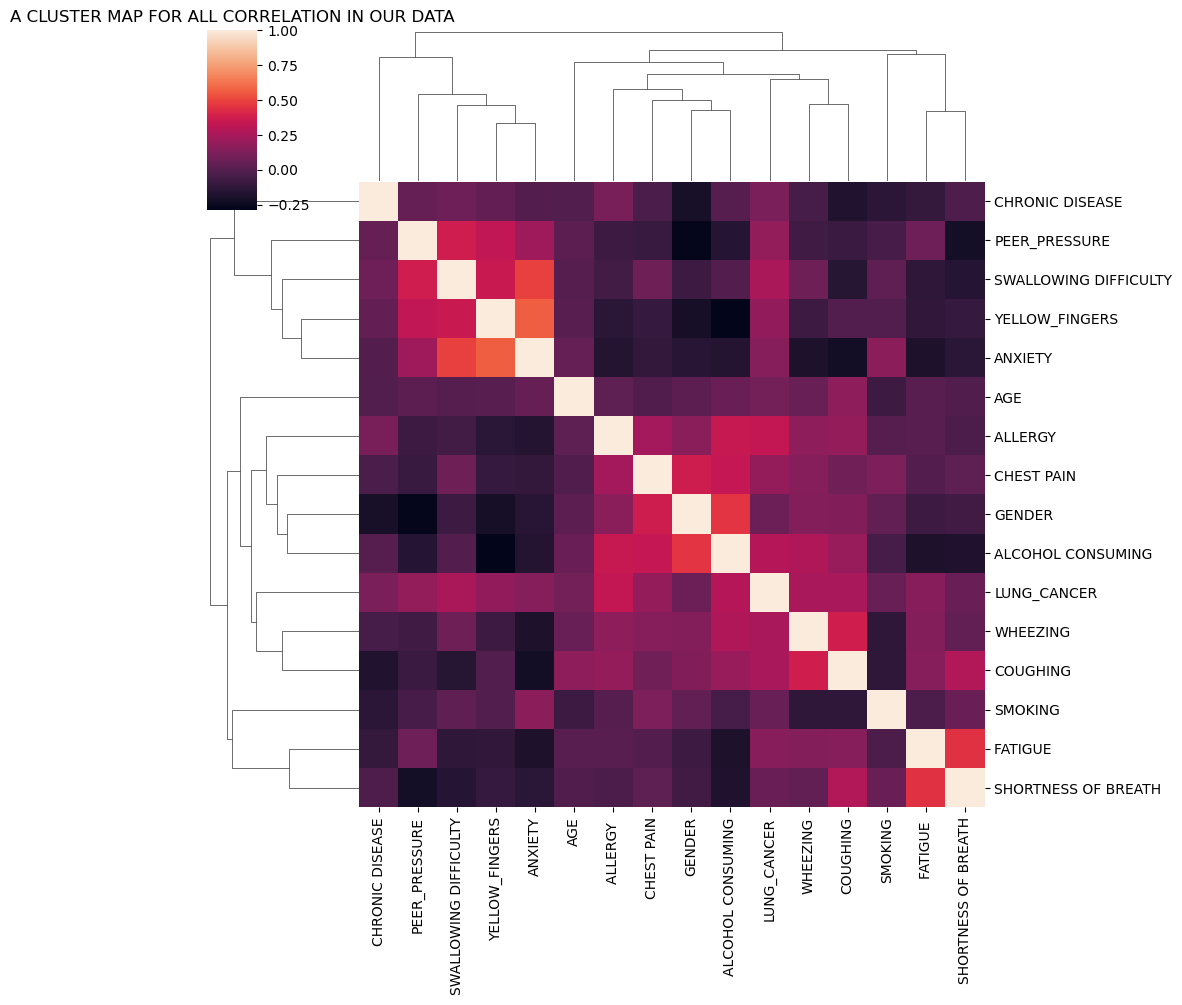

In [13]:
# Plot a Cluster Heat map
fig = plt.figure(figsize=(30,8))
sns.clustermap(correlation)
plt.title('A CLUSTER MAP FOR ALL CORRELATION IN OUR DATA')
plt.show()

# FEATURE SELECTION AND SPLITTING DATA

In [14]:
X = df.drop(['LUNG_CANCER','AGE'],axis=1).values
y = df['LUNG_CANCER'].values.reshape(-1,1)
X = MinMaxScaler().fit_transform(X)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
# Convert them into tensors 
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

# DEEP LEARNING 

In [17]:
# create a linear model 
torch.manual_seed(42)
class LungCancerModel(nn.Module):
    def __init__(self,input_dim=14,hidden_dim=96,output_dim=1):
        super().__init__()
        self.input_dim=input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.linear1 = nn.Linear(input_dim,hidden_dim)
        self.linear2 = nn.Linear(hidden_dim,hidden_dim)
        self.fc = nn.Linear(hidden_dim,output_dim)
    def forward(self,x:torch.Tensor):
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.fc(x)
        return x

In [18]:
model= LungCancerModel()

In [19]:
with torch.inference_mode():
    predictions = model.forward(X_train[:3])
    predictions = torch.round(predictions)
    print(predictions)

tensor([[0.],
        [0.],
        [0.]])


# TRAINING OUR MODEL

In [20]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [21]:
epochs = 200
for epoch in range(epochs):
    model.train()
    y_pred = model.forward(X_train)
    loss  = criterion(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        y_pred = model.forward(X_test)
        testing_loss = criterion(y_pred,y_test)
        if epoch% 5 == 0:
            print(f"The Epoch {epoch} the Loss is {loss} and the validation loss is {testing_loss}")

The Epoch 0 the Loss is 0.673869788646698 and the validation loss is 1.1401267051696777
The Epoch 5 the Loss is 0.3278926610946655 and the validation loss is 0.1892518401145935
The Epoch 10 the Loss is 0.13921411335468292 and the validation loss is 0.06519036740064621
The Epoch 15 the Loss is 0.12290533632040024 and the validation loss is 0.08313854783773422
The Epoch 20 the Loss is 0.10359214246273041 and the validation loss is 0.059347156435251236
The Epoch 25 the Loss is 0.09017173200845718 and the validation loss is 0.06195185333490372
The Epoch 30 the Loss is 0.08189993351697922 and the validation loss is 0.04786577448248863
The Epoch 35 the Loss is 0.07752034813165665 and the validation loss is 0.052834704518318176
The Epoch 40 the Loss is 0.07490844279527664 and the validation loss is 0.047894515097141266
The Epoch 45 the Loss is 0.07318353652954102 and the validation loss is 0.05130944028496742
The Epoch 50 the Loss is 0.07216346263885498 and the validation loss is 0.0504676103

In [22]:
with torch.inference_mode():
    predictions = model.forward(X_train[:20])
    predictions = torch.round(predictions)
    print(predictions)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.]])


# THE END OF THE PROJECT :
AS PER THE OBJECTIVE I HAVE CREATED A MODEL THAT PREDICTS WHETHER OR NOT YOU GET A CANCER DIAGNOSIS . MY MODEL HAS THREE 
LINEAR LAYERS WITH 14 INPUTS AND 1 OUTPUT